In [242]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy import signal as sg

In [243]:
# 이미지 읽기
# image = []
# for i in range(10):
#   image.append(cv2.imread('/content/drive/MyDrive/Colab Notebooks/ 컴퓨터비전 2022/texture_data/train/brick/brick'+str(i)+'.jpg'))
#   # plt.imshow(image[i])
# print(len(image))
# image2 = []
# gray = []
# rows = []
# cols = []
# for i in range(len(image)):
#   image2.append(cv2.cvtColor(image[i], cv2.COLOR_BGR2RGB))
#   gray.append(cv2.cvtColor(image[i], cv2.COLOR_BGR2GRAY))
#   (rows[i], cols[i]) = gray[i].shape[:2]
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/ 컴퓨터비전 2022/texture_data/train/wood/wood10.jpg')
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(rows, cols) = gray.shape[:2]

In [244]:
# 이미지 전처리
smooth_kernel = (1/25)*np.ones((5,5)) #smoothing filter
gray_smooth = sg.convolve(gray, smooth_kernel, "same")  # 흑백 이미지 스무딩

gray_processed = np.abs(gray - gray_smooth)

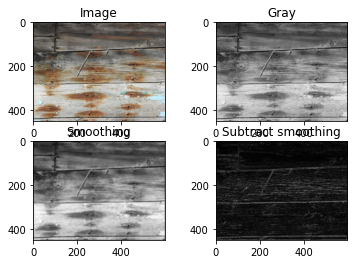

In [245]:
# 전처리된 이미지 시각화

plt.figure('Image pre-processing')  #그림판(백지) 만들기

plt.subplot(221)  # 그림판 2행 2열로 나누고 1번 영역에 그림 그리기
plt.title('Image')  # 이름 지정
plt.imshow(image2)  # RGB 이미지 추가하기

plt.subplot(222)  # 그림판 2행 2열로 나누고 2번 영역에 그림 그리기
plt.title('Gray')
plt.imshow(gray,'gray') # 흑백 이미지 추가

plt.subplot(223)  # 그림판 2행 2열로 나누고 3번 영역에 그림 그리기
plt.title('Smoothing')
plt.imshow(gray_smooth, 'gray') # smoothing 된 이미지 추가

plt.subplot(224)  # 그림판 2행 2열로 나누고 4번 영역에 그림 그리기
plt.title('Subtract smoothing')
plt.imshow(gray_processed, 'gray')  # smoothing 이미지를 뺀 이미지 추가

## Law's Texture Filter

In [246]:
filter_vectors = np.array([[1,4,6,4,1],       # L5
                          [-1,-2,0,2,1],     # E5
                          [-1,0,2,0,1],      # S5
                          [1, -4,6,-4,1]])   # R5

filters = list()
for i in range(4):
  for j in range(4):
    filters.append(np.matmul(filter_vectors[i][:].reshape(5,1),  # 매트릭스 곱셈 연산을 통해 filter 계산
                            filter_vectors[j][:].reshape(1,5)))

## Convolution 연산 및 convmap 조합

In [247]:
conv_maps = np.zeros((rows, cols, 16))  # 계산된 convolution 결과를 저장할 conv_maps
for i in range(len(filters)):
  conv_maps[:,:,i] = sg.convolve(gray_processed, filters[i], 'same')  # 전처리된 이미지에 16개 필터 적용


# 9+1개 중요한 texture map 계산
texture_maps = list()
texture_maps.append((conv_maps[:,:,1]+conv_maps[:,:,4])//2)
texture_maps.append((conv_maps[:,:,2]+conv_maps[:,:,8])//2)
texture_maps.append((conv_maps[:,:,3]+conv_maps[:,:,12])//2)
texture_maps.append((conv_maps[:,:,7]+conv_maps[:,:,13])//2)
texture_maps.append((conv_maps[:,:,6]+conv_maps[:,:,9])//2)
texture_maps.append((conv_maps[:,:,11]+conv_maps[:,:,14])//2)
texture_maps.append(conv_maps[:,:,10])
texture_maps.append(conv_maps[:,:,5])
texture_maps.append(conv_maps[:,:,15])
texture_maps.append(conv_maps[:,:,0])


# Law's texture energy 계산
TEM = list()
for i in range(9):
  TEM.append(np.abs(texture_maps[i]).sum() / np.abs(texture_maps[9]).sum())

f = open("/content/drive/MyDrive/Colab Notebooks/ 컴퓨터비전 2022/TEM.txt", "a")
f.write("none ")
for i in range(9):
  f.write(str(TEM[i])+" ")
f.write("\n")
f.close()


In [250]:
f = open("/content/drive/MyDrive/Colab Notebooks/ 컴퓨터비전 2022/TEM.txt","r")
lines = f.readlines()
brick = [0]*10

for line in lines:
  l = line.split()
  for i in range(1,len(l)):
    brick[i] += float(l[i])
    float(brick[i])

print(brick)

[0, 0.623058541449008, 1.2595173021476738, 1.3014107629168215, 0.33334942520310296, 0.13242463668561047, 0.277055351870993, 0.18670489567641424, 0.21053768573704068, 0.6706587226721525]


In [249]:
# # 결과 시각화

# def norm(ar):
#   # Convolution 된 이미즐ㄹ 0~255로 정규화
#   return 255.*np.absolute(ar)/np.max(ar)

# plt.figure('Texture Maps')  # 그림판(벽지) 만들기

# plt.subplot(331)  # 그림판을 3*3 행렬로 나누고 1번 영역에 그림그리기
# plt.title('L5E5 / E5L5')  # 이름 지정
# plt.imshow(norm(texture_maps[0]), 'gray') # L5E5 / E5L5 filter 로 처리한 이미지를 흑백으로 추가하기

# plt.subplot(332)
# plt.title('L5S5 / S5L5')
# plt.imshow(norm(texture_maps[1]), 'gray')

# plt.subplot(333)
# plt.title('L5R5 / R5L5')
# plt.imshow(norm(texture_maps[2]), 'gray')

# plt.subplot(334)
# plt.title('E5R5 / R5E5')
# plt.imshow(norm(texture_maps[3]), 'gray')

# plt.subplot(335)
# plt.title('E5S5 / S5E5')
# plt.imshow(norm(texture_maps[4]), 'gray')

# plt.subplot(336)
# plt.title('S5R5 / R5S5')
# plt.imshow(norm(texture_maps[5]), 'gray')

# plt.subplot(337)
# plt.title('S5S5')
# plt.imshow(norm(texture_maps[6]), 'gray')

# plt.subplot(338)
# plt.title('E5E5')
# plt.imshow(norm(texture_maps[7]), 'gray')

# plt.subplot(339)
# plt.title('R5R5')
# plt.imshow(norm(texture_maps[8]), 'gray')